In [2]:
import pandas as pd
import numpy as np

In [34]:
SCENARIO_NUMBER = 3
options = {
    0:(5.0,'put'),
    1:(5.5,'put'),
    2:(6.0,'put'),
    3:(6.5,'put'),
    4:(7.0,'put'),
    5:(7.5,'put'),
    6:(8.0,'put'),
    7:(5.0,'call'),
    8:(5.5,'call'),
    9:(6.0,'call'),
    10:(6.5,'call'),
    11:(7.0,'call'),
    12:(7.5,'call'),
    13:(8.0,'call'),
}
scenario = pd.read_csv('104/Scenario'+ str(SCENARIO_NUMBER) +'.csv')
prices = pd.read_csv('104/option_prices_scenario_'+ str(SCENARIO_NUMBER) + '.csv')
prices_list = prices['Price [USD]'].to_list()
scenario_list = scenario.to_dict(orient='list')

In [35]:
scenario['total'] = scenario['yield [thousands of bushels]'] * scenario['price [$/bushel]'] * 1000

<Axes: ylabel='Frequency'>

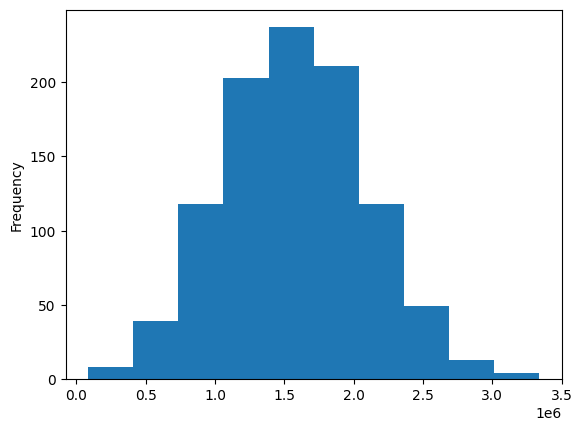

In [36]:
scenario['total'].plot.hist()

In [37]:
def calculate_profit(strike, market_price, typ):
    if typ == 'call':
        return max(100 * (market_price - strike), 0.0)
    return max(100 * (strike - market_price), 0.0)


In [38]:
def profit(option_prices, yi, market_price, strategy):
    res = yi * market_price * 1000
    before_options = res
    for i in range(14):
        strike, typ = options[i]
        res += strategy[i] * calculate_profit(strike, market_price, typ)
        res -= option_prices[i] * strategy[i]
    return res

In [39]:
def get_incomes_of_strategy(strategy, market_prices, yields, option_prices, return_quantiles=False):
    profits = []
    for i in range(1000):
        curr_profit = profit(option_prices, yields[i], market_prices[i], strategy)
        profits.append(curr_profit)
    return profits

In [40]:
strat = [145.0, 387.0, 537.0, 1090.0, 267.0, 256.0, 237.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [41]:
total_options = get_incomes_of_strategy(strat, scenario_list['price [$/bushel]'], scenario_list['yield [thousands of bushels]'], prices_list,)

<Axes: ylabel='Frequency'>

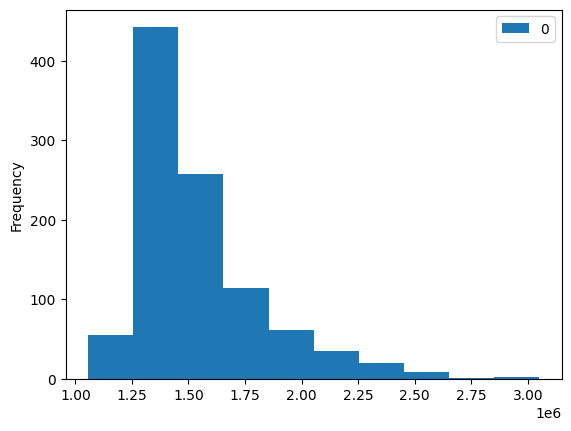

In [42]:
final_data = pd.DataFrame(total_options)
final_data.plot.hist()

In [43]:
final_data.to_csv('expected_income_options' + str(SCENARIO_NUMBER) + '.csv')